In [ ]:
#Standard Library Imports
import numpy as np
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt


#Built-in Functions
import re
import json
from typing import List, Dict, Union, Tuple

#pandas settings
# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

# auto reload imports
%load_ext autoreload
%autoreload 2

In [ ]:
#Establish a connection to the database
connection = sqlite3.connect('attr_data.db')
print('Database opened successfully')

Database opened successfully


In [ ]:
query = 'SELECT * FROM attrition_records'
df= pd.read_sql_query(query, connection, index_col= 'id')


In [ ]:
#Display SQLite database imported into pandas DataFrame (df)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


In [ ]:
#viewing the first five rows
few_rows = df.head(5)
few_rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
#view the shape of the dataframe
shape = df.shape
shape

The result above (1470, 35) reveals that the data contains 1470 rows and 36 columns

In [ ]:
print(df.describe())

In [ ]:
#Select specific columns
column_selected = ['Age', 'YearsAtCompany', 'Attrition']
dataframe = df[column_selected]
dataframe

,Age,YearsAtCompany,Attrition
id,,,
1,41,6,Yes
2,49,10,No
3,37,0,Yes
4,33,8,No
5,27,2,No
...,...,...,...
1466,36,5,No
1467,39,7,No
1468,27,6,No


In [ ]:
sort_data = df.sort_values('Age', ascending = False)

In [ ]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
group_data = df.groupby('Age').mean()

In [ ]:
#Summing the age column education column together
df['age_education'] = df['Age'] + df['Education']

In [ ]:
df['age_education']

**QUESTION 1**
Employee attrition rate is influenced by three major factors Job satisfaction, Salary, and work life balance. The following block of codes shows the relationship between these factors and employee attrition

In [ ]:
#Find the attrition rate
attrition_rate = df['Attrition'].value_counts(normalize = True) * 100
attrition_rate

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [ ]:
#Analyse the Job Satisfaction rate
satisfaction_counts = df['JobSatisfaction'].value_counts()
satisfaction_counts

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [ ]:
#Calculate the average salary for the attrition and non-attrition groups
avg_salary = df.groupby('Attrition')['MonthlyIncome'].mean()
avg_salary

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

The average monthly income for the attrition group is a lower than the non attrition employees. This confirms that income is a big factor in employee attrition  

In [ ]:
#Analyse the worklife balance rating of employees for the attrition and non attrition groups
balance_counts = df.groupby('WorkLifeBalance').count()['Attrition']
balance_counts


WorkLifeBalance
1     80
2    344
3    893
4    153
Name: Attrition, dtype: int64

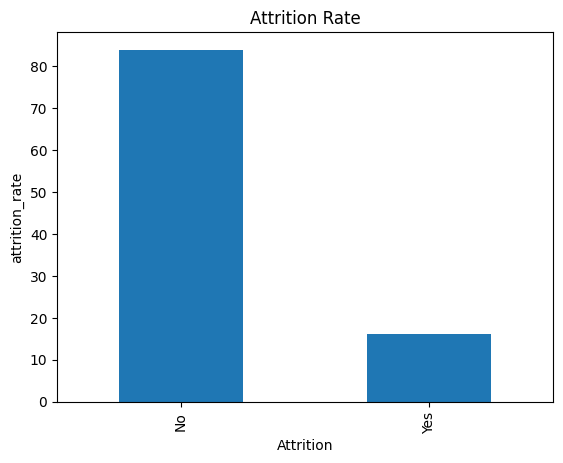

In [ ]:
#Visualize the factors using barplots in matplotlib
attrition_rate.plot(kind='bar')
plt.xlabel('Attrition')
plt.ylabel('attrition_rate')
plt.title('Attrition Rate')
plt.show()

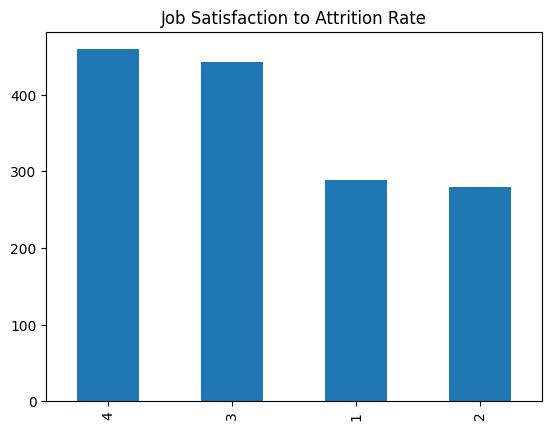

In [ ]:
satisfaction_counts.plot(kind='bar')
plt.title('Job Satisfaction to Attrition Rate')
plt.show()

**QUESTION 2**

What is the relationship between Education and Monthly Income?


In [ ]:
#This is the average income in each education level aategory
income_by_education = df.groupby('Education')['MonthlyIncome'].mean()
income_by_education

Education
1    5640.570588
2    6226.645390
3    6517.263986
4    6832.402010
5    8277.645833
Name: MonthlyIncome, dtype: float64

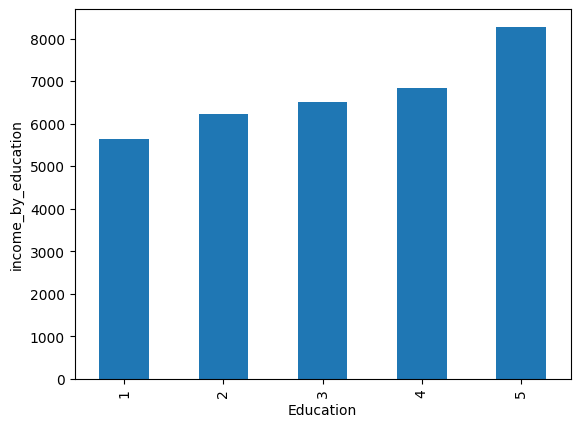

In [ ]:
#Visualizing using bar plot
income_by_education.plot(kind= 'bar')
plt.xlabel('Education')
plt.ylabel('income_by_education')
plt.show()

This visualization shows that the average monthly income increases as the education level increases with Level 5 being the highest earner. There is a little difference between level 2 earners, level 3 earners and level 4 earners.

In [ ]:
income_summary_by_education = df.groupby('Education')['MonthlyIncome'].agg(['median', 'min', 'max'])
income_summary_by_education

,median,min,max
Education,,,
1,3849.0,1009,19973
2,4891.5,1051,19613
3,4762.0,1081,19926
4,5341.5,1359,19999
5,6203.0,2127,19586


**QUESTION 3**

What is the effect of age on attrition?




In [ ]:
display_all_ages = df['Age'].unique()
display_all_ages

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [ ]:
df_1 = df.copy()
df_1.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_education
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,43
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,50
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,39
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,37
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,28


In [ ]:
df_1['Attrition'] = df_1['Attrition'].map({'Yes': 1, 'No': 0})
df_1.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_education
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,43
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,50
3,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,39
4,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,37
5,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,28


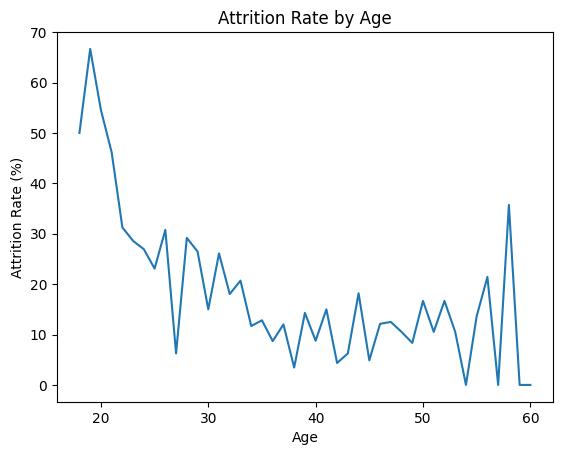

In [ ]:
# Group data by age and calculate attrition rate
attrition_rate_by_age = df_1.groupby('Age')['Attrition'].mean() * 100

# Create a line plot
plt.plot(attrition_rate_by_age.index, attrition_rate_by_age)
plt.xlabel('Age')
plt.ylabel('Attrition Rate (%)')
plt.title('Attrition Rate by Age')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

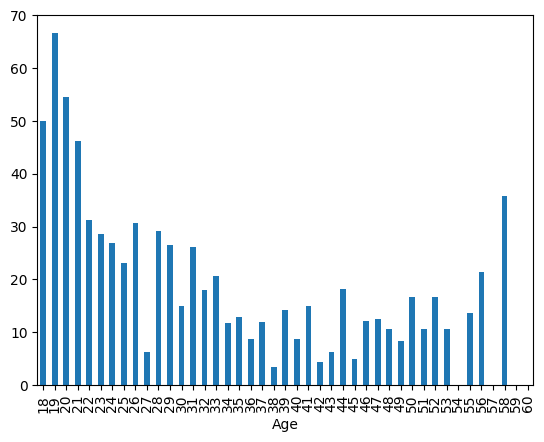

In [ ]:
attrition_rate_by_age.plot(kind= 'bar')
plt.show

**Younger workers within the age of 18-21 are more prone to leave a company**

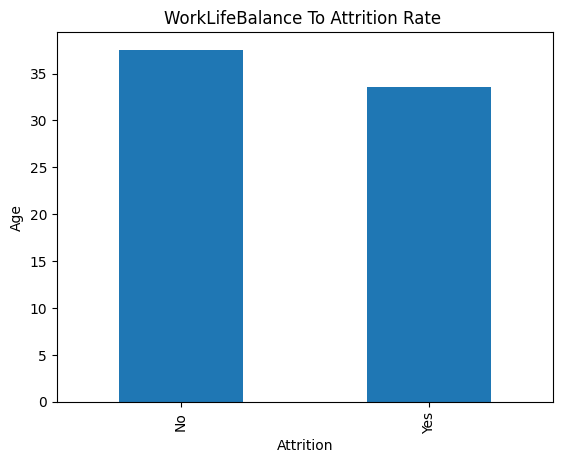

In [ ]:
# Group data by age and calculate attrition rate
attrition_rate_by_age = df.groupby('Attrition')['Age'].mean()

attrition_rate_by_age.plot(kind = 'bar')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.title('WorkLifeBalance To Attrition Rate ')
plt.show()


**Question 4**


Is Income the main factor towards employee attrition?


In [ ]:
#Calculate the average salary for the attrition and non-attrition groups
avg_salary = df.groupby('Attrition')['MonthlyIncome'].mean()
avg_salary

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64

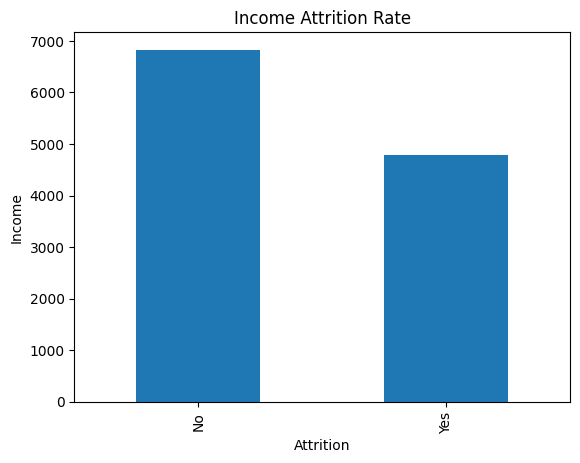

In [ ]:
avg_salary.plot(kind = 'bar')
plt.xlabel('Attrition')
plt.ylabel('Income')
plt.title('Income Attrition Rate')
plt.show()

The average monthly income for the attrition group is a lower than the non attrition employees. This confirms that income is a big factor in employee attrition according to the data and as seen fro he bar plot above



**QUESTION 5**


How does work-life balance impact the overall attrition rate?


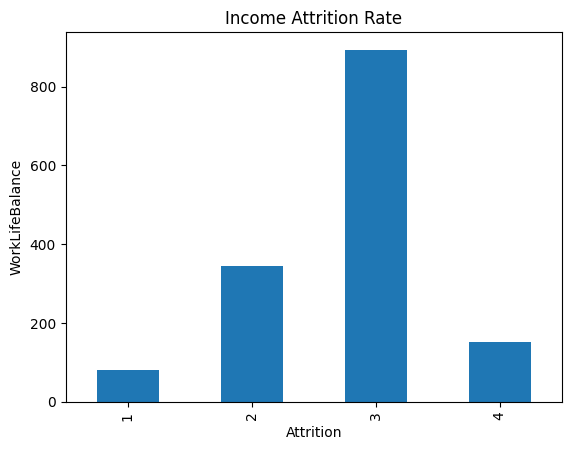

In [ ]:
balance_counts.plot(kind = 'bar')
plt.xlabel('Attrition')
plt.ylabel('WorkLifeBalance')
plt.title('Income Attrition Rate')
plt.show()